In [1004]:
import pandas as pd
from abilities import list_of_abilities
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [1005]:
df = pd.read_csv('../pokemony.csv')
df.isnull().sum()

Unnamed: 0            0
Name                  0
Category              0
Generation            0
Types                 0
Abilities             0
Catch_Rate            0
Egg_Groups            0
Hatch_Time            0
Height                0
Weight                0
Exp_Yield             0
Level_Rate            0
Evs                   0
Base_Friendship       0
Evolution_info        0
Male_Ratio            0
Female_Ratio          0
Locations             0
Stats                 0
Type_effectiveness    0
Moves                 0
dtype: int64

In [1006]:
df['Evs'].apply(lambda x: len(x))

0       83
1       83
2       83
3       83
4       83
        ..
1020    83
1021    83
1022    83
1023    83
1024    83
Name: Evs, Length: 1025, dtype: int64

In [1007]:
df['Male_Ratio'] = df["Male_Ratio"].fillna("Gender unknown")
df['Female_Ratio'] = df["Female_Ratio"].fillna("Gender unknown")

In [1008]:
df.isna().sum()

Unnamed: 0            0
Name                  0
Category              0
Generation            0
Types                 0
Abilities             0
Catch_Rate            0
Egg_Groups            0
Hatch_Time            0
Height                0
Weight                0
Exp_Yield             0
Level_Rate            0
Evs                   0
Base_Friendship       0
Evolution_info        0
Male_Ratio            0
Female_Ratio          0
Locations             0
Stats                 0
Type_effectiveness    0
Moves                 0
dtype: int64

In [1009]:
print(df['Stats'])

0       HP:\n45???Attack:\n49???Defense:\n49???Sp. Atk...
1       HP:\n60???Attack:\n62???Defense:\n63???Sp. Atk...
2       HP:\n80???Attack:\n82???Defense:\n83???Sp. Atk...
3       HP:\n39???Attack:\n52???Defense:\n43???Sp. Atk...
4       HP:\n58???Attack:\n64???Defense:\n58???Sp. Atk...
                              ...                        
1020    HP:\n125???Attack:\n73???Defense:\n91???Sp. At...
1021    HP:\n90???Attack:\n120???Defense:\n80???Sp. At...
1022    HP:\n90???Attack:\n72???Defense:\n100???Sp. At...
1023    HP:\n90???Attack:\n65???Defense:\n85???Sp. Atk...
1024    HP:\n88???Attack:\n88???Defense:\n160???Sp. At...
Name: Stats, Length: 1025, dtype: object


In [1010]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: x+1)

In [1011]:
df.rename(columns={'Unnamed: 0': 'Pokedex number'}, inplace=True)

In [1012]:
def remove_punc(x):
    punct = ' .,'
    for i in punct:
        x = x.replace(i, '')
    return x

In [1013]:
df['Gen'] = df['Generation'].apply(lambda x: remove_punc(x.split('Generation')[1][:4]))

In [1014]:
df.loc[809:904, 'Gen'] = 'VIII' #Changing gen of these pokemons since above line doesn't work for generation VIII

In [1015]:
def extract_abilities(x):
    current_pokemon_abilities = []
    for ability in list_of_abilities:
        if ability in x:
            current_pokemon_abilities.append(ability)
    return current_pokemon_abilities

In [1016]:
df['Abilities'] = df['Abilities'].apply(extract_abilities)

In [1017]:
df['Catch_Rate'][0].split()
df['Catch_Rate_Percentage'] = df['Catch_Rate'].apply(lambda x : x.split()[1].replace('(', '').replace(')', ''))

In [1018]:
df['Catch_Rate'] = df['Catch_Rate'].apply(lambda x: x.split()[0])

In [1019]:
list_of_egg_groups = [
    'Monster',
    'Human-Like',
    'Water 1',
    'Water 2',
    'Water 3',
    'Bug',
    'Mineral',
    'Flying',
    'Amorphous',
    'Field',
    'Fairy',
    'Ditto',
    'Grass',
    'Dragon',
    'No Eggs Discovered'
    ]


In [1020]:
def extract_egg_groups(x):
    current_pokemon_egs = []
    for eg in list_of_egg_groups:
        if eg in x:
            current_pokemon_egs.append(eg)
    return current_pokemon_egs

In [1021]:
df['Egg_Groups'] = df['Egg_Groups'].apply(extract_egg_groups)

In [1022]:
df['Hatch_Time'] = df['Hatch_Time'].apply(lambda x: x.split()[0])

<img src="../images/corrupted_columns.png" alt="drawing" width="800"/>

In [1023]:
#checking if weight columns is not corrupted
for i in df['Weight'].unique():
    if 'kg' not in i:
        print('x')

In [1024]:
df['Height'] = df['Height'].apply(lambda x: x.split('\t')[1].split()[0])

In [1025]:
df['Weight'] = df['Weight'].apply(lambda x: x.split()[0])

In [1026]:
df.rename(columns={"Hatch_Time": "Hatch Time (Cycles)", "Height": "Height (m)", "Weight" : "Weight (kg)"}, inplace=True)

In [1027]:
df['Exp_Yield'] = df['Exp_Yield'].apply(lambda x: x.split('\n')[0])

In [1028]:
df['Evs'][1]

'0 \n H P \t 0 \n A t k \t 0 \n D e f \t 1 \n S p . A t k \t 1 \n S p . D e f \t 0 \n S p e e d'

In [1029]:
def clean_ev(x):
    x = x.replace(' ', '').replace('*', '').split('\t')
    d = {}
    for ev in x:
        ev = ev.split('\n')
        stat = ev[1]
        value = int(ev[0])
        d[stat + " EV"] = value
    d['Total EV Yield'] = sum(d.values())
    return d

In [1030]:

df['Evs'] = df['Evs'].apply(clean_ev)

In [1031]:
def evolution(x):
    if 'evolves from' in x:
        x = x.split('evolves from')
        return x[1].split(" ")[1]
    else:
        return None

In [1032]:
df['Evolves From'] = df["Evolution_info"].apply(evolution)

In [1033]:
df.loc[df['Male_Ratio'] == "100% female", "Male_Ratio"] = '0% male'

In [1034]:
df.loc[df['Female_Ratio'] == "100% male", "Female_Ratio"] = '0% female'

In [1035]:
def pseudo_legendary(x):
    if 'pseudo-legendary' in x.lower():
        return True
    return False

def legendary(x):
    x = x.lower()
    if 'pseudo-legendary' not in x and 'legendary' in x:
        return True
    return False


def mythical(x):
    if 'mythical' in x.lower():
        return True
    return False


def ultra_beast(x):
    if 'ultra beast' in x.lower():
        return True
    return False


def paradox(x):
    if 'paradox' in x.lower():
        return True
    return False



In [1036]:
df['Pseudo Legendary'] = df['Generation'].apply(pseudo_legendary)
df['Legendary'] = df['Generation'].apply(legendary)
df['Mythical'] = df['Generation'].apply(mythical)
df['Ultra Beast'] = df['Generation'].apply(ultra_beast)
df['Paradox'] = df['Generation'].apply(paradox)

In [1037]:
def clean_stats(x):
    s = x.split('???')
    HP = s[0].split('\n')[1]
    Atk = s[1].split('\n')[1]
    Def = s[2].split('\n')[1]
    Sp_Atk = s[3].split('\n')[1]
    Sp_Def = s[4].split('\n')[1]
    Speed = s[5].split('\n')[1]
    Total = s[6].split('\n')[1]
    return {
            "Total Base Stat" : int(Total),
            "HP Stat": int(HP),
            "Atk Stat": int(Atk),
            "Def Stat": int(Def),
            "Sp.Atk Stat": int(Sp_Atk),
            "Sp.Def Stat": int(Sp_Def),
            "Speed Stat" : int(Speed)
            }


In [1038]:
df['Stats'] = df['Stats'].apply(clean_stats)

In [1039]:
df['Stats'][0]

{'Total Base Stat': 318,
 'HP Stat': 45,
 'Atk Stat': 49,
 'Def Stat': 49,
 'Sp.Atk Stat': 65,
 'Sp.Def Stat': 65,
 'Speed Stat': 45}

In [1040]:
df['Type_effectiveness'][0]

'Normal\t1×\nPoison\t1×\nGround\t1×\nRock\t1×\nBug\t1×\nGhost\t1×\nSteel\t1×\nDragon\t1×\nDark\t1× Flying\t2×\nFire\t2×\nPsychic\t2×\nIce\t2× None Fighting\t½×\nWater\t½×\nGrass\t¼×\nElectric\t½×\nFairy\t½×'

In [1041]:
def clean_type_effs(x):
        d = {}
        x = x.replace('\t', ' ')
        x = x.replace('\n', ' ')
        x = x.replace('None', '')
        x = x.replace('  ', ' ')

        splitted = x.split()
        special_cases = {'½×': 0.5, '¼×': 0.25, '1½×': 1.5}


        for i in range(0, len(splitted), 2):
                pokemon_type = splitted[i]
                effectiveness = splitted[i + 1]    
                if effectiveness in special_cases:
                        d[pokemon_type] = special_cases[effectiveness]
                else:
                        d[pokemon_type] = float(effectiveness[:-1])
                
        return d

In [1042]:
df['Type_effectiveness'] = df['Type_effectiveness'].apply(clean_type_effs)

In [1043]:
def clean_moves(x):
    list_of_moves = []
    x = x.split('???')[1:]
    for move in x:
        list_of_moves.append(move.split('\t')[1])
    return list_of_moves
        

In [1044]:
df['Moves'] = df['Moves'].apply(clean_moves)

In [1045]:
def clean_locations(x):
    locs = {}
    x = x.replace('???', '\n\n')
    x = x.split('\n\n')

    for part in x:
        game_locations = part.split('\n')
        games = game_locations[0].split('\t')
        location = game_locations[1].strip() if len(game_locations) > 1 else None
        for game in games:
            if game:
                locs[game] = location
        
    return locs

In [1046]:
df['Locations'] = df['Locations'].apply(clean_locations)

In [1047]:
df.drop(['Generation', 'Evolution_info'], axis=1, inplace=True)

In [1048]:
df.rename(columns={'Catch_Rate':'Catch Rate', 'Egg_Groups':'Egg Groups', 'Exp_Yield':'Base Experience Yield', 'Level_Rate':'Levelling Rate', 'Evs':"EV Yield", 'Male_Ratio':'Male Ratio', 'Female_Ratio':'Female Ratio', 'Type_effectiveness': 'Type Effectiveness', 'Catch_Rate_Percentage':'Catch Rate (%)', 'Base_Friendship':'Base Friendship'}, inplace=True)

In [1049]:
def delister(x):
    if len(x) == 1:
        return x[0]
    else:
        return x

df['Egg Groups'] = df['Egg Groups'].apply(delister)

In [1050]:
df.iloc[1]

Pokedex number                                                           2
Name                                                               Ivysaur
Category                                                      Seed Pokémon
Types                                                         Grass Poison
Abilities                                          [Chlorophyll, Overgrow]
Catch Rate                                                              45
Egg Groups                                                [Monster, Grass]
Hatch Time (Cycles)                                                     20
Height (m)                                                             1.0
Weight (kg)                                                           13.0
Base Experience Yield                                                  141
Levelling Rate                                                 Medium Slow
EV Yield                 {'HP EV': 0, 'Atk EV': 0, 'Def EV': 0, 'Sp.Atk...
Base Friendship          

In [1051]:
df['Abilities'] = df['Abilities'].apply(lambda x: list(set(x)))

In [1052]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='count', ylabel='Gen'>

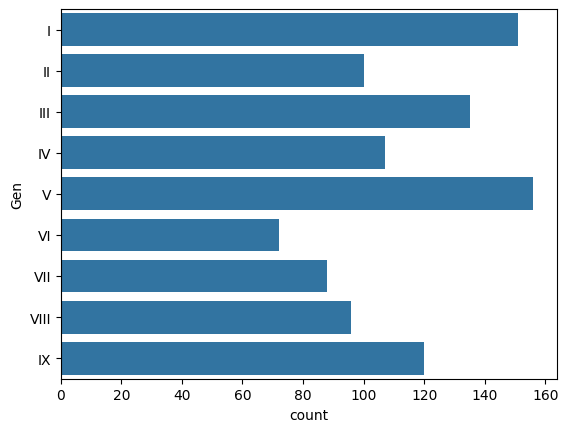

In [1053]:
sns.countplot(df['Gen'])

In [1054]:
stats_df = pd.json_normalize(df['Stats'])
evs_df = pd.json_normalize(df['EV Yield'])
type_effectiveness = pd.json_normalize(df['Type Effectiveness'])

In [1055]:
#df.set_index('Pokedex number').to_csv('../saves/PokemonComplete.csv')

In [1056]:
stats_df

,Total Base Stat,HP Stat,Atk Stat,Def Stat,Sp.Atk Stat,Sp.Def Stat,Speed Stat
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,309,39,52,43,60,50,65
4,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...
1020,590,125,73,91,137,89,75
1021,590,90,120,80,68,108,124
1022,590,90,72,100,122,108,98
1023,450,90,65,85,65,85,60


In [1057]:
type_effectiveness

,Normal,Poison,Ground,Rock,Bug,Ghost,Steel,Dragon,Dark,Flying,Fire,Psychic,Ice,Fighting,Water,Grass,Electric,Fairy
0,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5
1,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5
2,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,2.00,1.0,0.5,0.5,0.25,0.50,0.5
3,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5
4,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.0,1.00,2.0,1.0,1.00,1.0,0.5,2.0,1.0,0.5,0.5,1.00,2.0,1.0,0.5,0.50,0.25,2.0
1021,0.5,0.50,2.0,1.0,2.00,2.0,2.0,1.0,2.0,0.5,0.5,0.50,1.0,1.0,2.0,2.00,1.00,1.0
1022,0.5,0.00,2.0,0.5,1.00,2.0,0.5,0.5,2.0,0.5,2.0,0.25,0.5,1.0,1.0,0.50,1.00,0.5
1023,1.0,1.00,1.0,1.0,1.00,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,1.00,1.00,1.0


In [1058]:
evs_df

,HP EV,Atk EV,Def EV,Sp.Atk EV,Sp.Def EV,Speed EV,Total EV Yield
0,0,0,0,1,0,0,1
1,0,0,0,1,1,0,2
2,0,0,0,2,1,0,3
3,0,0,0,0,0,1,1
4,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...
1020,0,0,0,3,0,0,3
1021,0,0,0,0,0,3,3
1022,0,0,0,3,0,0,3
1023,0,0,1,0,0,0,1


In [1059]:
extended_df = pd.concat([df, evs_df, stats_df, type_effectiveness], axis=1)

In [1060]:
extended_df.columns

Index(['Pokedex number', 'Name', 'Category', 'Types', 'Abilities', 'Catch Rate', 'Egg Groups', 'Hatch Time (Cycles)', 'Height (m)', 'Weight (kg)', 'Base Experience Yield', 'Levelling Rate', 'EV Yield', 'Base Friendship', 'Male Ratio', 'Female Ratio', 'Locations', 'Stats', 'Type Effectiveness', 'Moves', 'Gen', 'Catch Rate (%)', 'Evolves From', 'Pseudo Legendary', 'Legendary', 'Mythical', 'Ultra Beast', 'Paradox', 'HP EV', 'Atk EV', 'Def EV', 'Sp.Atk EV', 'Sp.Def EV', 'Speed EV', 'Total EV Yield', 'Total Base Stat', 'HP Stat', 'Atk Stat', 'Def Stat', 'Sp.Atk Stat', 'Sp.Def Stat', 'Speed Stat', 'Normal', 'Poison', 'Ground', 'Rock', 'Bug', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Flying', 'Fire', 'Psychic', 'Ice', 'Fighting', 'Water', 'Grass', 'Electric', 'Fairy'], dtype='object')

In [1061]:
extended_df.drop(['Type Effectiveness', 'Stats', 'EV Yield'], axis=1, inplace=True)

In [1062]:
extended_df['Pseudo Legendary'] = extended_df['Pseudo Legendary'].astype(float)
extended_df['Legendary'] = extended_df['Legendary'].astype(float)
extended_df['Mythical'] = extended_df['Mythical'].astype(float)
extended_df['Ultra Beast'] = extended_df['Ultra Beast'].astype(float)
extended_df['Paradox'] = extended_df['Paradox'].astype(float)

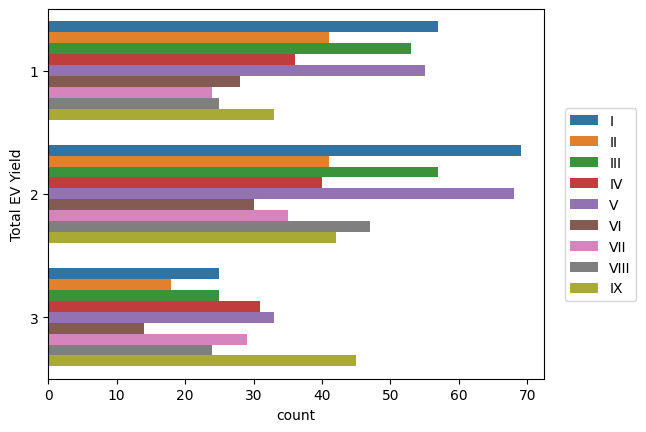

In [1063]:
sns.countplot(y='Total EV Yield', hue='Gen', data=extended_df)
plt.legend(bbox_to_anchor=(1.2, 0.75))

In [1064]:
extended_df['Locations'][0]

{'Red': 'First partner Pokémon from Professor Oak in Pallet Town',
 'Blue': 'First partner Pokémon from Professor Oak in Pallet Town',
 'Blue (Japan)': 'First partner Pokémon from Professor Oak in Pallet Town',
 'Yellow': "Received from a girl in Cerulean City if the partner Pikachu's friendship is 147 or higher",
 'Gold': 'Time Capsule, Event',
 'Silver': 'Time Capsule, Event',
 'Crystal': 'Time Capsule, Event',
 'Ruby': 'Trade, Event',
 'Sapphire': 'Trade, Event',
 'Emerald': 'Trade, Event',
 'FireRed': 'First partner Pokémon from Professor Oak in Pallet Town',
 'LeafGreen': 'First partner Pokémon from Professor Oak in Pallet Town',
 'Colosseum': 'Trade',
 'XD': 'Trade',
 'Diamond': 'Trade',
 'Pearl': 'Trade',
 'Platinum': 'Trade',
 'HeartGold': 'Received from Professor Oak in Pallet Town after defeating Red',
 'SoulSilver': 'Received from Professor Oak in Pallet Town after defeating Red',
 'Pal Park': 'Field',
 'Black': 'Global Link Event',
 'White': 'Global Link Event',
 'Black 2':

In [1065]:
extended_df['Types'].apply(lambda x: x.split())
def get_type2(x):
    x = x.split()
    if len(x) > 1:
        return x[1]

extended_df['Type1'] = extended_df['Types'].apply(lambda x: x.split()[0])
extended_df['Type2'] = extended_df['Types'].apply(get_type2)

In [1066]:
extended_df.drop('Types', axis=1, inplace=True)

In [1067]:
extended_df

,Pokedex number,Name,Category,Abilities,Catch Rate,Egg Groups,Hatch Time (Cycles),Height (m),Weight (kg),Base Experience Yield,Levelling Rate,Base Friendship,Male Ratio,Female Ratio,Locations,Moves,Gen,Catch Rate (%),Evolves From,Pseudo Legendary,Legendary,Mythical,Ultra Beast,Paradox,HP EV,Atk EV,Def EV,Sp.Atk EV,Sp.Def EV,Speed EV,Total EV Yield,Total Base Stat,HP Stat,Atk Stat,Def Stat,Sp.Atk Stat,Sp.Def Stat,Speed Stat,Normal,Poison,Ground,Rock,Bug,Ghost,Steel,Dragon,Dark,Flying,Fire,Psychic,Ice,Fighting,Water,Grass,Electric,Fairy,Type1,Type2
0,1,Bulbasaur,Seed Pokémon,"[Chlorophyll, Overgrow]",45,"[Monster, Grass]",20,0.7,6.9,64,Medium Slow,70,87.5% male,12.5% female,{'Red': 'First partner Pokémon from Professor ...,"[Tackle, Growl, Vine Whip, Growth, Leech Seed,...",I,11.9%,None,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,318,45,49,49,65,65,45,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5,Grass,Poison
1,2,Ivysaur,Seed Pokémon,"[Chlorophyll, Overgrow]",45,"[Monster, Grass]",20,1.0,13.0,141,Medium Slow,70,87.5% male,12.5% female,"{'Red': 'Evolve Bulbasaur', 'Blue': 'Evolve Bu...","[Tackle, Growl, Vine Whip, Growth, Leech Seed,...",I,11.9%,Bulbasaur,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,2,405,60,62,63,80,80,60,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5,Grass,Poison
2,3,Venusaur,Seed Pokémon,"[Chlorophyll, Overgrow, Thick Fat]",45,"[Monster, Grass]",20,2.0,100.0,208,Medium Slow,70,87.5% male,12.5% female,"{'Red': 'Evolve Ivysaur', 'Blue': 'Evolve Ivys...","[Petal Dance, Tackle, Growl, Vine Whip, Growth...",I,11.9%,Ivysaur,0.0,0.0,0.0,0.0,0.0,0,0,0,2,1,0,3,525,80,82,83,100,100,80,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,2.00,1.0,0.5,0.5,0.25,0.50,0.5,Grass,Poison
3,4,Charmander,Lizard Pokémon,"[Blaze, Solar Power]",45,"[Monster, Dragon]",20,0.6,8.5,65,Medium Slow,70,87.5% male,12.5% female,{'Red': 'First partner Pokémon from Professor ...,"[Scratch, Growl, Ember, Smokescreen, Dragon Br...",I,11.9%,None,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,309,39,52,43,60,50,65,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5,Fire,None
4,5,Charmeleon,Flame Pokémon,"[Blaze, Solar Power]",45,"[Monster, Dragon]",20,1.1,19.0,142,Medium Slow,70,87.5% male,12.5% female,"{'Red': 'Evolve Charmander', 'Blue': 'Evolve C...","[Scratch, Growl, Ember, Smokescreen, Dragon Br...",I,11.9%,Charmander,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,2,405,58,64,58,80,65,80,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5,Fire,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,Paradox Pokémon,[Protosynthesis],10,No Eggs Discovered,50,5.2,480.0,295,Slow,0,Gender unknown,Gender unknown,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '...","[Twister, Sunny Day, Shock Wave, Stomp, Ancien...",IX,3.9%,None,0.0,0.0,0.0,0.0,1.0,0,0,0,3,0,0,3,590,125,73,91,137,89,75,1.0,1.00,2.0,1.0,1.00,1.0,0.5,2.0,1.0,0.5,0.5,1.00,2.0,1.0,0.5,0.50,0.25,2.0,Electric,Dragon
1021,1022,Iron Boulder,Paradox Pokémon,[Quark Drive],10,No Eggs Discovered,50,1.5,162.5,295,Slow,0,Gender unknown,Gender unknown,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '...","[Horn Attack, Leer, Rock Throw, Electric Terra...",IX,3.9%,None,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,3,3,590,90,120,80,68,108,124,0.5,0.50,2.0,1.0,2.00,2.0,2.0,1.0,2.0,0.5,0.5,0.50,1.0,1.0,2.0,2.00,1.00,1.0,Rock,Psychic
1022,1023,Iron Crown,Paradox Pokémon,[Quark Drive],10,No Eggs Discovered,50,1.6,156.0,295,Slow,0,Gender unknown,Gender unknown,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '...","[Leer, Electric Terrain, Confusion, Metal Claw...",IX,3.9%,None,0.0,0.0,0.0,0.0,1.0,0,0,0,3,0,0,3,590,90,72,100,122,108,98,0.5,0.00,2.0,0.5,1.00,2.0,0.5,0.5,2.0,0.5,2.0,0.25,0.5,1.0,1.0,0.50,1.00,0.5,Steel,Psychic
1023,1024,Terapagos,Tera Pokémon,"[Teraform Ze

In [1068]:
extended_df.drop('Catch Rate (%)', axis=1, inplace=True)

In [1069]:
roman_numerals = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5,
    'VI': 6,
    'VII': 7,
    'VIII': 8,
    'IX': 9
}


extended_df['Gen'] = extended_df['Gen'].apply(lambda x: roman_numerals[x])

In [1070]:

extended_df['Catch Rate'] = df['Catch Rate'].astype('int64')
extended_df['Hatch Time (Cycles)'] = df['Hatch Time (Cycles)'].astype('int64')
extended_df['Height (m)'] = df['Height (m)'].astype('float64')
extended_df['Weight (kg)'] = df['Weight (kg)'].astype('float64')
extended_df['Base Experience Yield'] = df['Base Experience Yield'].astype('int64')
extended_df['Base Friendship'] = df['Base Friendship'].astype('int64')
extended_df['Gen'] = extended_df['Gen'].astype('int64')

In [1071]:
def clean_genders(x):
    chars = '1234567890.%'

    if x == 'Gender unknown':
        return 0
    elif x == '♂':
        return 0
    elif x == '♀':
        return 1
    else:
        for i in x:
            if i not in chars:
                x = x.replace(i, '')
        return float(x.strip('%')) / 100

In [1072]:
extended_df['Male Ratio'] = extended_df['Male Ratio'].apply(clean_genders)
extended_df['Female Ratio'] = extended_df['Female Ratio'].apply(clean_genders)


In [1077]:
extended_df.isna().sum()

Pokedex number             0
Name                       0
Category                   0
Abilities                  0
Catch Rate                 0
Egg Groups                 0
Hatch Time (Cycles)        0
Height (m)                 0
Weight (kg)                0
Base Experience Yield      0
Levelling Rate             0
Base Friendship            0
Male Ratio                 0
Female Ratio               0
Locations                  0
Moves                      0
Gen                        0
Evolves From             542
Pseudo Legendary           0
Legendary                  0
Mythical                   0
Ultra Beast                0
Paradox                    0
HP EV                      0
Atk EV                     0
Def EV                     0
Sp.Atk EV                  0
Sp.Def EV                  0
Speed EV                   0
Total EV Yield             0
Total Base Stat            0
HP Stat                    0
Atk Stat                   0
Def Stat                   0
Sp.Atk Stat   

In [1079]:
extended_df.set_index('Pokedex number').to_csv('../saves/PokemonsForModel.csv')